In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
#copy URL for 2 players' profiles on Fbref
url1 = "https://fbref.com/en/players/c13ddd3e/Matias-Soule"
url2 = "https://fbref.com/en/players/20730eae/Rafael-Leao"
#the players selected above are random examples

df1 = pd.read_html(url1)
df2 = pd.read_html(url2)

In [235]:
#statistics will be the same for both players, so creating one DataFrame is sufficient
statistics_df = df1[0]['Statistic']

In [236]:
#by default there are NAN columns (where the metrics are categorized)
statistics_df = statistics_df.dropna(axis=0)
statistics_df = statistics_df.reset_index(drop=True)

In [237]:
#shorten the length of certain metrics
#for example, npXG; non-penalty xG can be shortened to the abbreviation before the colon
for i in range(len(statistics_df)):
    if (':' in statistics_df[i]):
        statistics_df[i] = statistics_df[i].split(":")[0]

In [238]:
percentiles_df_1 = df1[0]['Percentile']
percentiles_df_1 = percentiles_df_1.dropna(axis=0)
percentiles_df_1 = percentiles_df_1.reset_index(drop=True)

percentiles_df_2 = df2[0]['Percentile']
percentiles_df_2 = percentiles_df_2.dropna(axis=0)
percentiles_df_2 = percentiles_df_2.reset_index(drop=True)

In [239]:
frames = [statistics_df, percentiles_df_1, percentiles_df_2]

result = pd.concat(frames, axis=1)

In [240]:
result.head()

,Statistic,Percentile,Percentile
0,Non-Penalty Goals,93.0,90.0
1,npxG,93.0,73.0
2,Shots Total,74.0,66.0
3,Assists,12.0,77.0
4,xAG,74.0,83.0


In [241]:
#on fbref it is fairly obvious that metrics are grouped based on attacking output, in possession stats (passing, carrying, dribbles) and defending(out of possession)
output = result[:7]
possession = result[7:14]
defending = result[14:]

In [242]:
output_statistics = output['Statistic']
player1_output = output.iloc[:,1]
player2_output = output.iloc[:,2]
output_x = np.arange(len(output_statistics))

possession_statistics = possession['Statistic']
player1_possession = possession.iloc[:,1]
player2_possession = possession.iloc[:,2]
possession_x = np.arange(len(possession_statistics))

defending_statistics = defending['Statistic']
player1_defending = defending.iloc[:,1]
player2_defending = defending.iloc[:,2]
defending_x = np.arange(len(defending_statistics))

In [243]:
player1_name = url1.split('/')[-1].replace('-', ' ')
player2_name = url2.split('/')[-1].replace('-', ' ') 
graphTitle = "Percentiles: " + player1_name + " vs " + player2_name

barWidth = 0.25


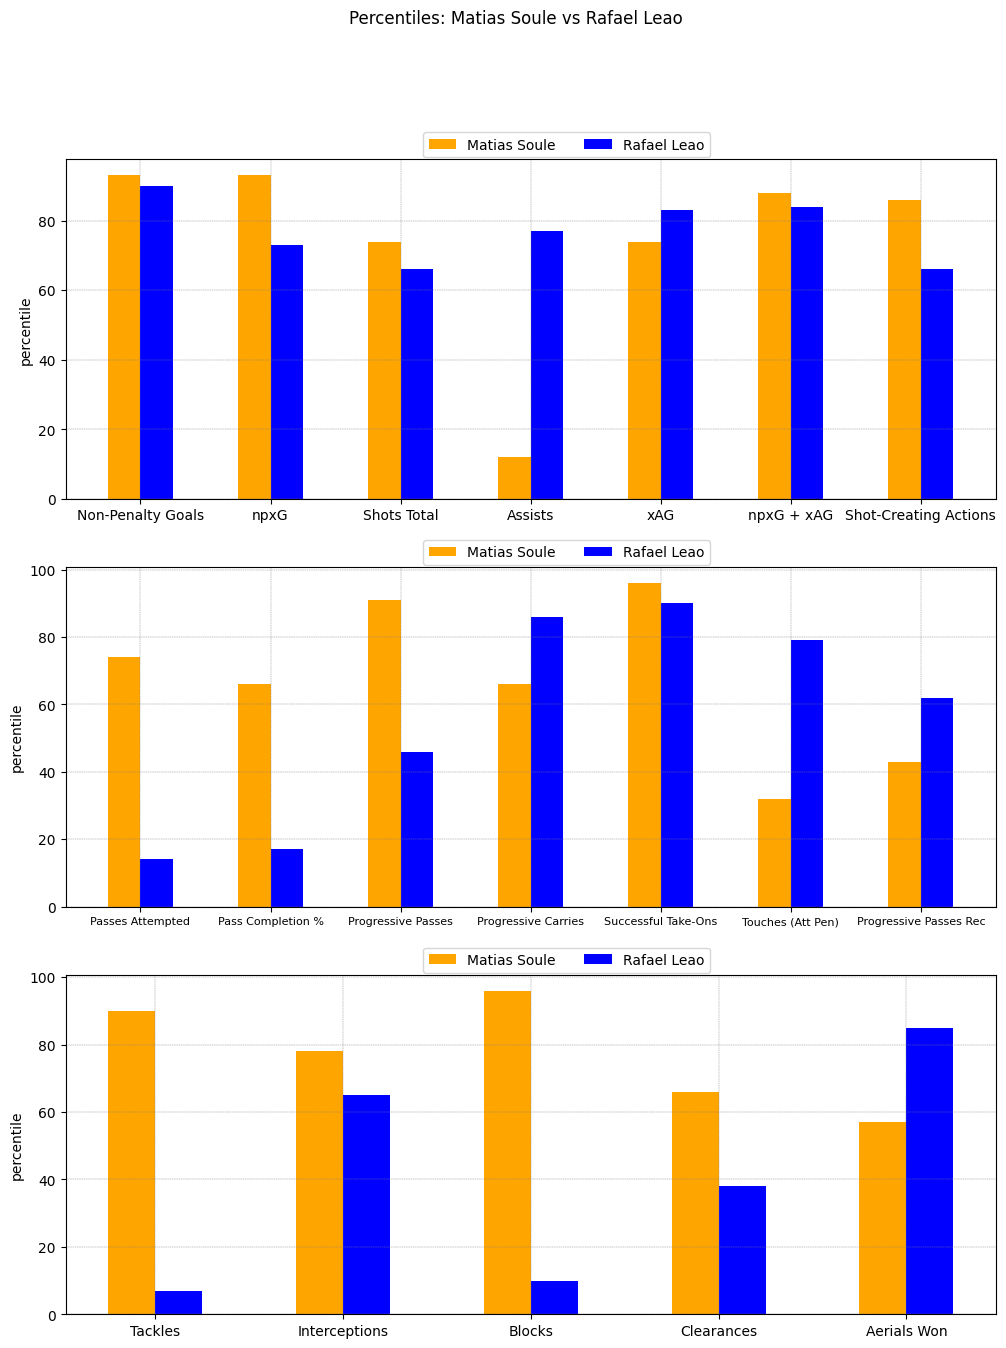

In [244]:
plt.figure(figsize=(12,15))

plt.subplot(311)
plt.bar(output_x-barWidth/2, player1_output, color='orange', width=0.25)
plt.bar(output_x+barWidth/2, player2_output, color='blue', width=0.25)
plt.ylabel('percentile')
plt.xticks(output_x,output_statistics)
plt.grid(color='gray', linestyle='--', linewidth = 0.3)
plt.legend([player1_name, player2_name], bbox_to_anchor =(0.70, 1.10), ncol=2)

plt.subplot(312)
plt.bar(possession_x-barWidth/2, player1_possession, color='orange', width=0.25)
plt.bar(possession_x+barWidth/2, player2_possession, color='blue', width=0.25)
plt.ylabel('percentile')
plt.xticks(possession_x, possession_statistics, fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth = 0.3)
plt.legend([player1_name, player2_name], bbox_to_anchor =(0.70, 1.10), ncol=2)

plt.subplot(313)
plt.bar(defending_x-barWidth/2, player1_defending, color='orange', width=0.25)
plt.bar(defending_x+barWidth/2, player2_defending, color='blue', width=0.25)
plt.ylabel('percentile')
plt.xticks(defending_x, defending_statistics)
plt.grid(color='gray', linestyle='--', linewidth = 0.3)
plt.legend([player1_name, player2_name], bbox_to_anchor =(0.70, 1.10), ncol=2)

plt.suptitle(graphTitle)
plt.show()